In [16]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [17]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [18]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [19]:
# Use the citipy module to determine city based on latitude and longitude.
#  6.1.4
from citipy import citipy

In [20]:
# Create a list for holding the cities. 6.1.5
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

630

In [21]:
# 6.2.2
import requests
requests.__version__

'2.25.1'

In [22]:
# Import the API key. 6.2.3
from configW import weather_api_key

In [23]:
# Starting URL for Weather Map API Call. 6.2.3
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=0546ad5dbee13bad86394b7d864b452c


In [24]:
# Import the datetime module from the datetime library.
from datetime import datetime

In [25]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters. We want the first iteration of the logging for each recorded response and the set to start at 1
record_count = 1
set_count = 1

Beginning Data Retrieval     
-----------------------------


In [26]:
# Loop through all the cities in the list 6.2.6.
for i, city in enumerate(cities):

        # Group cities in sets of 50 for logging purposes.(while grouping our records in sets of 50)
    if (i % 50 == 0 and i >= 50):
        #If the statement is true, then the set_count and the record_count are incremented by 1
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    #without enumerate() it was: city_url = url + "&q=" + cities[i]
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    #removing the blank spaces in the city name 
    # and concatenating the city name. This will find the corresponding weather data for the city 
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    
    #instead of finding the weather data for the first part of the city name
    # Add 1 to the record count.
    record_count += 1
    
    # Run an API request for each of the cities.

    try:
        # Parse the JSON and retrieve data.
            #If there is no weather data for the city, i.e. , a <Response [404]> 
            #then there is no weather to retrieve and City not found. Skipping... is printed.
            # If there is weather data for the city, we will retrieve the latitude, longitude, 
            #maximum temperature, humidity, cloudiness, wind speed, and date and assign those values to variables
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        
        #We append the cities list with a dictionary for that city, 
        #where the key-value pairs are the values from our weather parameter
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        #Generally, it isn't good coding practice to add the pass statement to the except block. 
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Processing Record 1 of Set 1 | busselton
Processing Record 2 of Set 1 | korla
Processing Record 3 of Set 1 | shimoda
Processing Record 4 of Set 1 | coquimbo
Processing Record 5 of Set 1 | kavieng
Processing Record 6 of Set 1 | karratha
Processing Record 7 of Set 1 | khristoforovo
City not found. Skipping...
Processing Record 8 of Set 1 | ayorou
Processing Record 9 of Set 1 | mataura
Processing Record 10 of Set 1 | kushima
Processing Record 11 of Set 1 | punta arenas
Processing Record 12 of Set 1 | ponta do sol
Processing Record 13 of Set 1 | rikitea
Processing Record 14 of Set 1 | qaanaaq
Processing Record 15 of Set 1 | ushuaia
Processing Record 16 of Set 1 | svetlogorsk
Processing Record 17 of Set 1 | torbay
Processing Record 18 of Set 1 | kladanj
Processing Record 19 of Set 1 | mahajanga
Processing Record 20 of Set 1 | tura
Processing Record 21 of Set 1 | kahului
Processing Record 22 of Set 1 | eureka
Processing Record 23 of Set 1 | antofagasta
Processing Record 24 of Set 1 | pevek
P

Processing Record 41 of Set 4 | gigmoto
Processing Record 42 of Set 4 | kenai
Processing Record 43 of Set 4 | bethel
Processing Record 44 of Set 4 | palabuhanratu
City not found. Skipping...
Processing Record 45 of Set 4 | bandiagara
Processing Record 46 of Set 4 | dowa
Processing Record 47 of Set 4 | nizhneyansk
City not found. Skipping...
Processing Record 48 of Set 4 | thompson
Processing Record 49 of Set 4 | nizhneivkino
Processing Record 50 of Set 4 | canutama
Processing Record 1 of Set 5 | provideniya
Processing Record 2 of Set 5 | dingle
Processing Record 3 of Set 5 | luderitz
Processing Record 4 of Set 5 | kunming
Processing Record 5 of Set 5 | hofn
Processing Record 6 of Set 5 | katsuura
Processing Record 7 of Set 5 | nang rong
Processing Record 8 of Set 5 | hun
Processing Record 9 of Set 5 | nyurba
Processing Record 10 of Set 5 | hervey bay
Processing Record 11 of Set 5 | tukrah
Processing Record 12 of Set 5 | turayf
Processing Record 13 of Set 5 | hearst
Processing Record 14

Processing Record 33 of Set 8 | wajid
Processing Record 34 of Set 8 | gladstone
Processing Record 35 of Set 8 | huilong
Processing Record 36 of Set 8 | verkhnyaya inta
Processing Record 37 of Set 8 | ulaanbaatar
Processing Record 38 of Set 8 | kabale
Processing Record 39 of Set 8 | gillette
Processing Record 40 of Set 8 | solnechnyy
Processing Record 41 of Set 8 | oktyabrskoye
Processing Record 42 of Set 8 | bonthe
Processing Record 43 of Set 8 | sovetskiy
Processing Record 44 of Set 8 | saldanha
Processing Record 45 of Set 8 | tezu
Processing Record 46 of Set 8 | pilao arcado
City not found. Skipping...
Processing Record 47 of Set 8 | nishihara
Processing Record 48 of Set 8 | big spring
Processing Record 49 of Set 8 | bonavista
Processing Record 50 of Set 8 | national city
Processing Record 1 of Set 9 | mirzapur
Processing Record 2 of Set 9 | abu dhabi
Processing Record 3 of Set 9 | coihaique
Processing Record 4 of Set 9 | lavrentiya
Processing Record 5 of Set 9 | pascagoula
Processin

Processing Record 18 of Set 12 | havelock
Processing Record 19 of Set 12 | camp verde
Processing Record 20 of Set 12 | hare bay
Processing Record 21 of Set 12 | sorong
Processing Record 22 of Set 12 | baoma
Processing Record 23 of Set 12 | pangnirtung
Processing Record 24 of Set 12 | bindura
Processing Record 25 of Set 12 | kharp
Processing Record 26 of Set 12 | taunggyi
Processing Record 27 of Set 12 | kaduy
Processing Record 28 of Set 12 | henties bay
Processing Record 29 of Set 12 | aasiaat
Processing Record 30 of Set 12 | okha
Processing Record 31 of Set 12 | marsh harbour
Processing Record 32 of Set 12 | beloha
Processing Record 33 of Set 12 | lenger
Processing Record 34 of Set 12 | gogrial
Processing Record 35 of Set 12 | yakima
Processing Record 36 of Set 12 | hojo
Processing Record 37 of Set 12 | benavente
Processing Record 38 of Set 12 | douentza
Processing Record 39 of Set 12 | mokhsogollokh
Processing Record 40 of Set 12 | kisangani
Processing Record 41 of Set 12 | dolinsk
P

In [27]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(5)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Busselton,-33.6500,115.3333,51.04,81,0,9.80,AU,2021-08-06 16:45:54
1,Korla,41.7597,86.1469,84.63,22,100,6.38,CN,2021-08-06 16:45:55
2,Shimoda,34.6667,138.9500,78.10,88,45,7.92,JP,2021-08-06 16:45:55
3,Coquimbo,-29.9533,-71.3436,58.73,72,40,10.36,CL,2021-08-06 16:41:59
4,Kavieng,-2.5744,150.7967,82.08,76,99,9.98,PG,2021-08-06 16:45:55


In [28]:
# Reorder the columns and run the cell
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df.head(5)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Busselton,AU,2021-08-06 16:45:54,-33.6500,115.3333,51.04,81,0,9.80
1,Korla,CN,2021-08-06 16:45:55,41.7597,86.1469,84.63,22,100,6.38
2,Shimoda,JP,2021-08-06 16:45:55,34.6667,138.9500,78.10,88,45,7.92
3,Coquimbo,CL,2021-08-06 16:41:59,-29.9533,-71.3436,58.73,72,40,10.36
4,Kavieng,PG,2021-08-06 16:45:55,-2.5744,150.7967,82.08,76,99,9.98


In [29]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV, that header will be present in the DataFrame
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [30]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

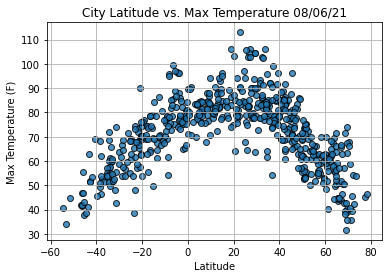

In [31]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

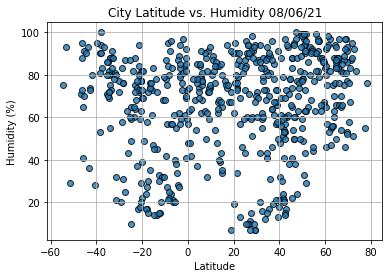

In [32]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

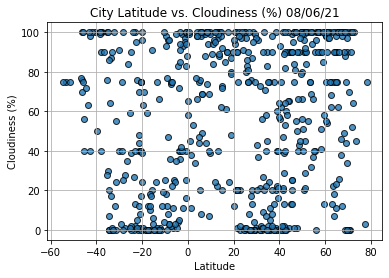

In [33]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

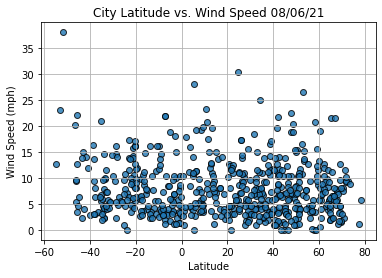

In [34]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()


In [35]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()
    #If we run this code there will be no output until we call the function with five parameters.

In [38]:
#  Perform regression analysis on the maximum temperatures in the Northern and Southern Hemispheres.
index13 = city_data_df.loc[13]
print(index13)

City                      Ushuaia
Country                        AR
Date          2021-08-06 16:43:49
Lat                         -54.8
Lng                         -68.3
Max Temp                    40.62
Humidity                       75
Cloudiness                     75
Wind Speed                  12.66
Name: 13, dtype: object


In [39]:
# filter a DataFrame based on a value of a row. 
# For instance, if we wanted to get all Northern Hemisphere latitudes, for latitudes greater than or equal to 0
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
1,Korla,CN,2021-08-06 16:45:55,41.7597,86.1469,84.63,22,100,6.38
2,Shimoda,JP,2021-08-06 16:45:55,34.6667,138.9500,78.10,88,45,7.92
6,Ayorou,NE,2021-08-06 16:45:56,14.7308,0.9174,96.19,34,73,2.62
8,Kushima,JP,2021-08-06 16:45:57,31.4583,131.2333,77.63,94,21,5.01
10,Ponta Do Sol,PT,2021-08-06 16:45:58,32.6667,-17.1000,82.00,79,27,1.03


In [40]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

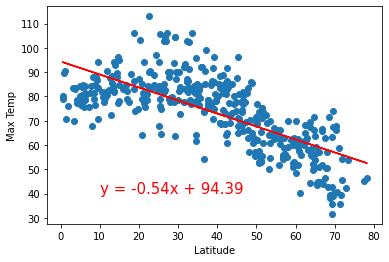

In [41]:
# To generate the linear regression on the maximum temperature for the Northern Hemisphere, 
# we'll need x and y values
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,40))

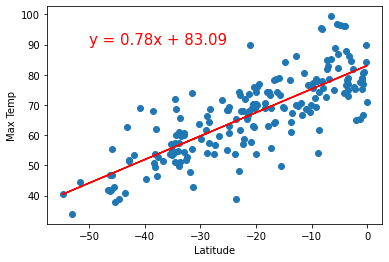

In [42]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(-50,90))

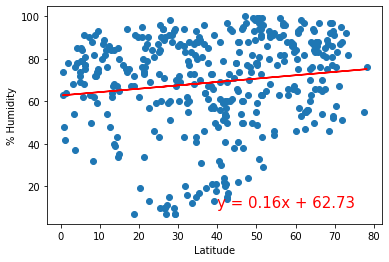

In [43]:
# Perform Linear Regression on the Percent Humidity for the Northern Hemisphere
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,10))

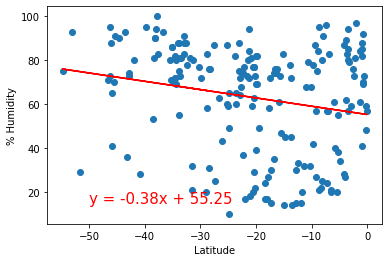

In [45]:
# Perform Linear Regression on the Percent Humidity for the Southern Hemisphere
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for % Humidity', '% Humidity',(-50,15))

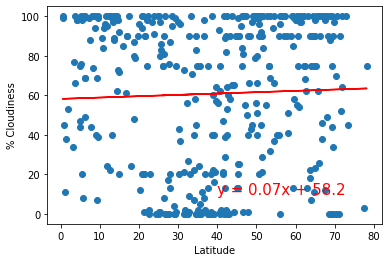

In [46]:
# Perform Linear Regression on the Percent Cloudiness for the Northern Hemisphere
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(40,10))

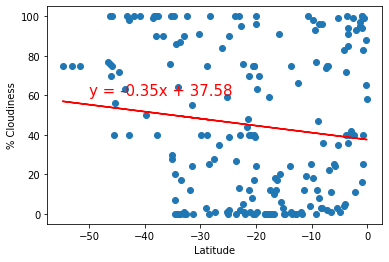

In [48]:
# Perform Linear Regression on the Percent Cloudiness for the Southern Hemisphere
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for % Cloudiness', '% Cloudiness',(-50,60))

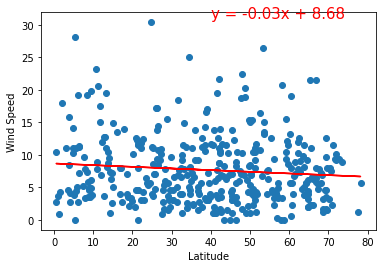

In [58]:
# Perform Linear Regression on the Wind Speed for the Northern Hemisphere
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for Wind Speed', 'Wind Speed',(40,31))

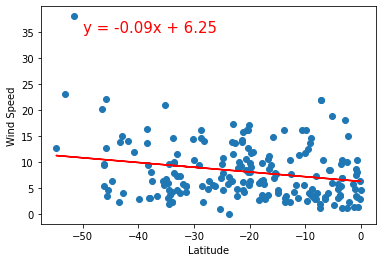

In [60]:
# Perform Linear Regression on the Wind Speed for the Southern Hemispher
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for Wind Speed', 'Wind Speed',(-50,35))